In [16]:
import cv2
import json
import imutils
import easyocr
import numpy as np
from matplotlib import pyplot as plt

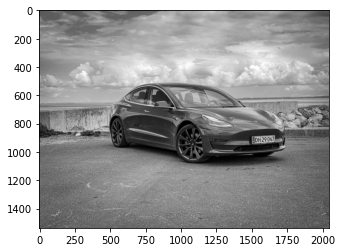

In [2]:
img  = cv2.imread("./misc/pictures/image_1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR))

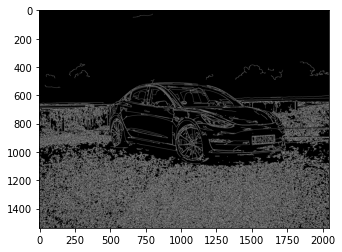

In [5]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [40]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [52]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    print(approx.size, len(approx))
    if len(approx) == 23:
        location = approx
        break

70 35
72 36
46 23


In [53]:
print(location)

[[[1112  803]]

 [[1168  799]]

 [[1309  832]]

 [[1371  823]]

 [[1383  803]]

 [[1540  809]]

 [[1413  807]]

 [[1341  780]]

 [[1375  766]]

 [[1435  773]]

 [[1375  766]]

 [[1342  779]]

 [[1250  740]]

 [[1392  801]]

 [[1370  809]]

 [[1231  748]]

 [[1151  735]]

 [[1151  754]]

 [[1212  815]]

 [[1149  755]]

 [[1149  734]]

 [[1147  752]]

 [[1195  804]]]


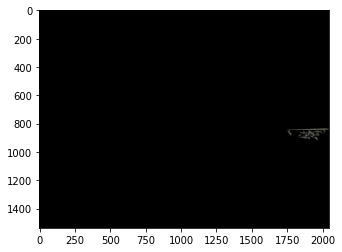

In [58]:
fig = plt.figure(figsize=(32, 32))
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    # print(approx.size, len(approx))
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [approx], 0,255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)
    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [54]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

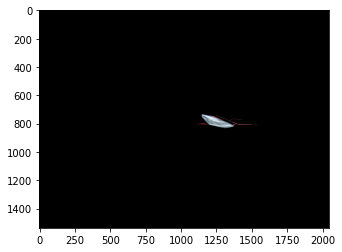

In [55]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))